# Lab 3

## Оригинальное изображение


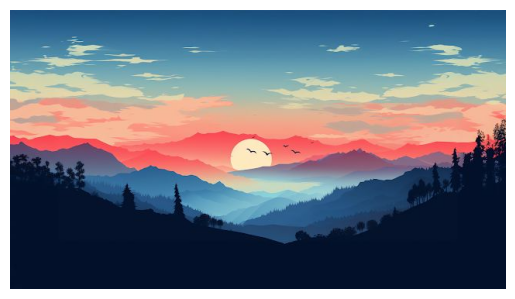

In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Загрузка изображения
image = cv2.imread('pict_hd.jpg')

# Преобразование изображения из BGR (формат OpenCV) в RGB (формат для matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Отображение изображения с помощью matplotlib
plt.imshow(image_rgb)
plt.axis('off') 
plt.show()


## 1. Простые геометрические преобразования (конформные, аффинные и проективные отображения)

# Проективные преобразования

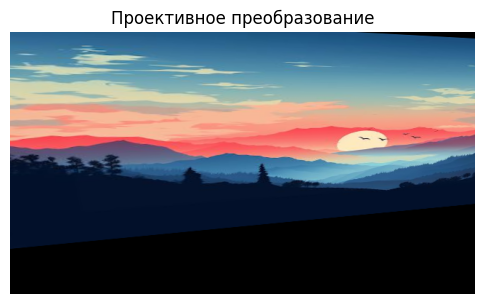

In [3]:
# Функция проективного преобразования 
def perspective_transformation(img):
    rows, cols, ch = img.shape
    
    # Определим четыре точки для проекционного преобразования (изначальные точки)
    pts1 = np.float32([[56,65], [368,52], [28,387], [389,390]])  # Точки на исходном изображении

    # Умеренно изменим целевые точки для более естественного эффекта
    pts2 = np.float32([[50,50], [cols-50,50], [50,rows-50], [cols-100, rows-100]])  # Целевые точки слегка смещены
    
    # Получим матрицу проективного преобразования
    M = cv2.getPerspectiveTransform(pts1, pts2)
    
    # Применим проективное преобразование
    dst = cv2.warpPerspective(img, M, (cols, rows))
    
    return dst

# Применим проективное преобразование к изображению
perspective_img = perspective_transformation(image_rgb)

# Отобразим результат проективного преобразования
plt.figure(figsize=(6,6))
plt.imshow(perspective_img)
plt.title("Проективное преобразование")
plt.axis('off')
plt.show()

# Аффинное преобразование

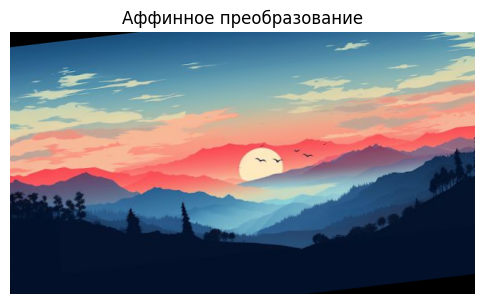

In [4]:
# Функция аффинного преобразования
def affine_transformation(img):
    rows, cols, ch = img.shape

    # Определим исходные точки для преобразования (треугольник)
    pts1 = np.float32([[50, 50], [200, 50], [50, 200]])  # Точки на исходном изображении

    # Целевые точки с более сдержанным изменением
    pts2 = np.float32([[40, 70], [210, 50], [50, 230]])  # Легкое смещение для более плавного эффекта

    # Получим матрицу аффинного преобразования
    M = cv2.getAffineTransform(pts1, pts2)

    # Применим аффинное преобразование
    dst = cv2.warpAffine(img, M, (cols, rows))

    return dst

# Применим аффинное преобразование к изображению
affine_img = affine_transformation(image_rgb)

# Отобразим результат аффинного преобразования
plt.figure(figsize=(6,6))
plt.imshow(affine_img)
plt.title("Аффинное преобразование")
plt.axis('off')
plt.show()

# Конформные преобразования

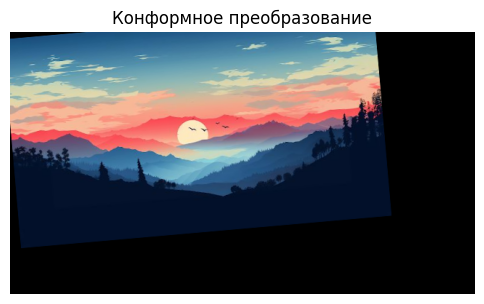

In [11]:
# Функция конформного преобразования (вращение и масштабирование)
def conformal_transformation(img):
    rows, cols, ch = img.shape
    
    # Определим угол вращения и масштаб
    angle = np.radians(-5)  # Вращение на 5 градусов
    scale = 0.8 # Масштаб 0.8
    
    # Получим матрицу преобразования (вращение + масштаб)
    M = np.float32([[scale * np.cos(angle), -scale * np.sin(angle), -10],
                    [scale * np.sin(angle), scale * np.cos(angle), 10]])
    
    # Применим конформное преобразование
    dst = cv2.warpAffine(img, M, (cols, rows))
    
    return dst
# Применим конформное преобразование к изображению
conformal_img = conformal_transformation(image_rgb)

# Отобразим результат конформного преобразования
plt.figure(figsize=(6,6))
plt.imshow(conformal_img)
plt.title("Конформное преобразование")
plt.axis('off')
plt.show()

# Отражение по вертикали и горизонтали 

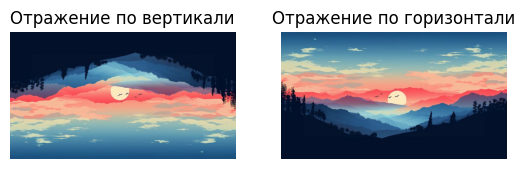

In [17]:
# Отражение по вертикали
dst_flip_vertical = cv2.flip(image, 0)  # 0 - по вертикали

# Отражение по горизонтали
dst_flip_horizontal = cv2.flip(image, 1)  # 1 - по горизонтали

# Отображение изображений
plt.subplot(121), plt.imshow(cv2.cvtColor(dst_flip_vertical, cv2.COLOR_BGR2RGB))
plt.title('Отражение по вертикали')
plt.axis('off')

plt.subplot(122), plt.imshow(cv2.cvtColor(dst_flip_horizontal, cv2.COLOR_BGR2RGB))
plt.title('Отражение по горизонтали')
plt.axis('off')
plt.show()

# 2. Коррекция дисторсии

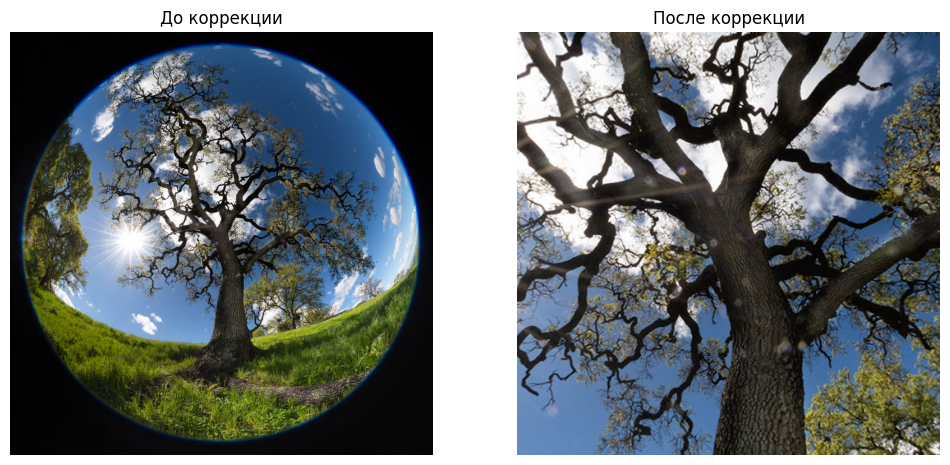

In [20]:
# Функция для коррекции дисторсии
def correct_distortion(img, K, D):
    h, w = img.shape[:2]

    # Определяем новые параметры камеры
    new_camera_matrix, roi = cv2.getOptimalNewCameraMatrix(K, D, (w, h), 1, (w, h))

    # Корректируем дисторсию
    undistorted_img = cv2.undistort(img, K, D, None, new_camera_matrix)
    x, y, w, h = roi
    undistorted_img = undistorted_img[y:y+h, x:x+w]

    return undistorted_img

# Загрузим изображение с бочкообразной дисторсией
image = cv2.imread('California-Oak.jpg')

# Камера параметры
K = np.array([[800, 0, image.shape[1]//2],   # Фокальная длина в пикселях
              [0, 800, image.shape[0]//2],
              [0, 0, 1]])

# Коэффициенты дисторсии: D = [k1, k2, p1, p2, k3]
# Увеличим k1 и k2 до больших значений для сильного бочкообразного эффекта
D = np.array([-0.9, 0.6, 0, 0])  # Сильная бочкообразная дисторсия

# Применим коррекцию дисторсии
undistorted_image = correct_distortion(image, K, D)

# Отобразим результат
plt.figure(figsize=(12,6))

# Исходное изображение с дисторсией
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('До коррекции')
plt.axis('off')

# Исправленное изображение
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(undistorted_image, cv2.COLOR_BGR2RGB))
plt.title('После коррекции')
plt.axis('off')
plt.show()

# 3. Склейка изображений (Image Stitching)


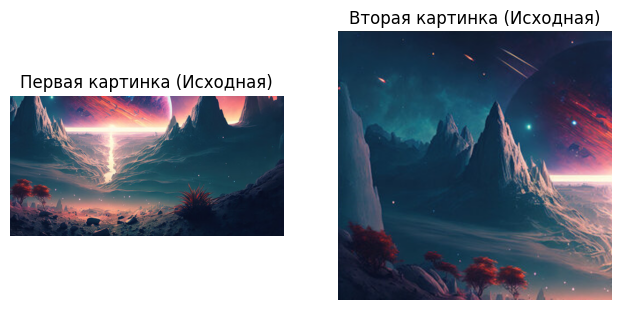

In [12]:
# Загружаем два изображения
img1 = cv2.imread('pict1.png')  # Первое изображение
img2 = cv2.imread('pict2.png')  # Второе изображение

# Отображаем исходные две картинки
plt.figure(figsize=(12, 6))

# Отображаем первое изображение
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('Первая картинка (Исходная)')
plt.axis('off')

# Отображаем второе изображение
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title('Вторая картинка (Исходная)')
plt.axis('off')

# Показываем результат
plt.show()

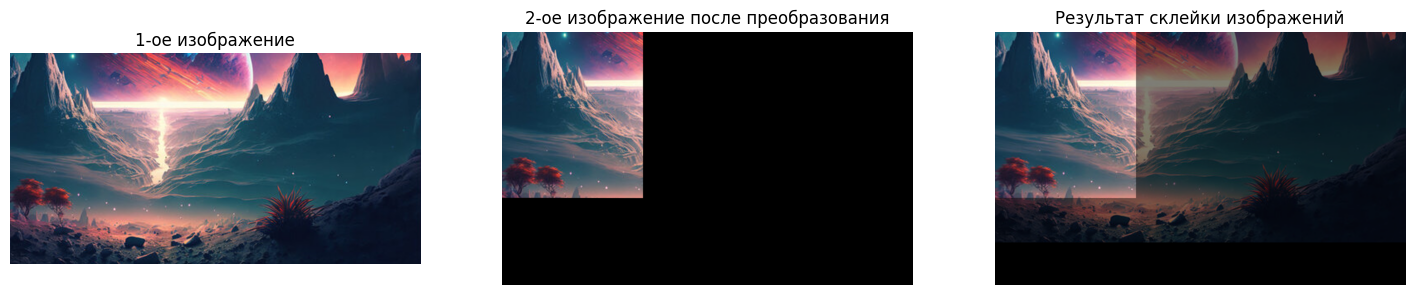

In [15]:
# Загрузим два изображения
img1 = cv2.imread('pict1.png')  # Первое изображение
img2 = cv2.imread('pict2.png')  # Второе изображение

# Преобразуем изображения в оттенки серого для поиска ключевых точек
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Используем ORB для обнаружения и описания ключевых точек
orb = cv2.ORB_create()

# Обнаруживаем ключевые точки и их дескрипторы на обоих изображениях
kp1, des1 = orb.detectAndCompute(gray1, None)
kp2, des2 = orb.detectAndCompute(gray2, None)

# Создаем матчеры для нахождения соответствующих точек
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)

# Сортируем матчи по расстоянию
matches = sorted(matches, key=lambda x: x.distance)

# Теперь необходимо извлечь позиции ключевых точек для гомографического преобразования
pts1 = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
pts2 = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

# Используем метод RANSAC для вычисления матрицы гомографии
matrix, mask = cv2.findHomography(pts2, pts1, cv2.RANSAC, 5.0)

# Применяем гомографическое преобразование ко второму изображению
h1, w1 = img1.shape[:2]
h2, w2 = img2.shape[:2]

# Определяем размеры итогового изображения: объединяем оба изображения
# Размеры итогового изображения будут достаточны для того, чтобы вместить обе картинки
result_size = (max(w1, w2), max(h1, h2))  # Максимальная ширина и высота из двух изображений

# Применяем гомографию ко второму изображению
img2_transformed = cv2.warpPerspective(img2, matrix, result_size)

# объединяем два изображения
# Для этого находим область, в которую будет вставляться первое изображение
result = np.zeros((result_size[1], result_size[0], 3), dtype=np.uint8)
result[:h1, :w1] = img1  # Вставляем первое изображение в результат

# Объединяем обе картинки, накладывая второе изображение на первую
# Применяем наложение с прозрачностью для второго изображения
cv2.addWeighted(img2_transformed, 0.5, result, 0.5, 0, result)

# Отображаем результат
plt.figure(figsize=(18, 6))

# Первое изображение
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('1-ое изображение')
plt.axis('off')

# Второе изображение после гомографии
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(img2_transformed, cv2.COLOR_BGR2RGB))
plt.title('2-ое изображение после преобразования')
plt.axis('off')

# Финальный результат склейки
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Результат склейки изображений')
plt.axis('off')

plt.show()